Working on pakistans largest E-commerce dataset. This dataset contains half a million items their selling details.

Installing required installations.

In [ ]:
!pip install "notebook>=5.3" "ipywidgets>=7.5"

In [101]:
#importing neccessary libraries.
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

import plotly as py
from plotly import tools
from plotly.offline import iplot
from plotly.subplots import make_subplots
import seaborn as sns
sns.set()

In [102]:
# loading dataset.
data=pd.read_csv(r'../input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv',parse_dates=['created_at'])
print("Data Dimensions are: ", data.shape)
#removing spaces between columns names.
data.columns=data.columns.str.replace(" ", "_").str.lower()
print("Columns: ", data.columns)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning:

Columns (1,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



Data Dimensions are:  (1048575, 26)
Columns:  Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'working_date', 'bi_status', '_mv_', 'year', 'month', 'customer_since',
       'm-y', 'fy', 'customer_id', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23',
       'unnamed:_24', 'unnamed:_25'],
      dtype='object')


• What is the best-selling category?

In [103]:
print('most selled category is :',data['category_name_1'].value_counts().idxmax())

most selled category is : Mobiles & Tablets


• Find any hidden patterns that are counter-intuitive for a layman

Text(0.5, 1.0, 'Quantifying missing data')

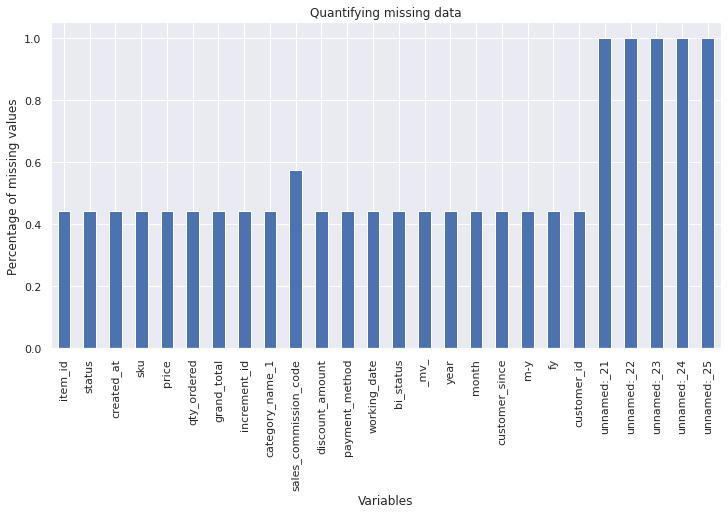

In [104]:
# Visualizing the percentage of null values
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [105]:
# removing null values and renaming some columns.
data.drop(["unnamed:_21", "unnamed:_22", "unnamed:_23", "unnamed:_24", "unnamed:_25"], axis = 1, inplace=True)
data.dropna(how='all', axis=0, inplace=True)
data.rename(columns={"_mv_": "mv", "category_name_1": "category_name"}, inplace = True)

In [106]:
# grouping by status
data.groupby('bi_status')['status'].value_counts()

bi_status  status        
#REF!      complete               1
Gross      canceled          201249
           payment_review        57
           pending               48
           processing            33
           holded                31
           fraud                 10
           pending_paypal         7
           \N                     4
Net        complete          233684
           closed               494
Valid      received           77290
           order_refunded     59529
           refund              8050
           cod                 2859
           paid                1159
           exchange               4
Name: status, dtype: int64

In [107]:
# For simplicity we can merge all statuses into Completed, Cancelled and Refund
dict_status = {'Completed':['complete','closed','received','cod','paid','exchange','payment_review','pending','processing','holded','pending_paypal'],'Refund':['order_refunded','refund'], 'Cancelled':['canceled','fraud',np.nan]}
for n in range(len(dict_status)):
    key,value=list(dict_status.items())[n]
    data['status'].replace(value, key,inplace=True)
    n+=1

Text(0.5, 1.0, 'Status  - Distinct Counts')

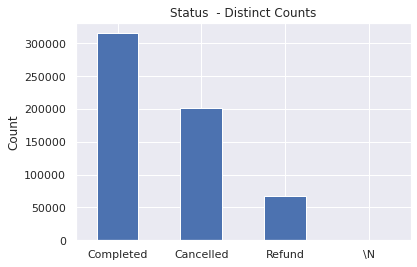

In [108]:
# bar plots for status categorical variables
data['status'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Status  - Distinct Counts')

In [109]:
data.drop(['working_date', 'mv', 'increment_id','bi_status','sales_commission_code'],axis=1,inplace=True)

In [110]:
skunique=data[data['category_name']==r'\N']['sku'].unique().tolist()

In [111]:
sku_nil=data[data['sku'].isin(skunique)]
sku_nil['category_name'].value_counts()

\N                   7850
Men's Fashion         739
Others                556
Superstore             13
Mobiles & Tablets      10
Women's Fashion         8
Entertainment           3
Appliances              2
Name: category_name, dtype: int64

In [112]:
dict_sku={}
cat=["Men's Fashion",'Others','Superstore','Mobiles & Tablets',"Women's Fashion",'Entertainment','Appliances']
for n in cat:
    dict_sku[n]= n
for n in range(len(dict_sku)):
    key,value=list(dict_sku.items())[n]
    dict_sku[key]=sku_nil[sku_nil['category_name']== key]['sku'].unique().tolist()
    data.loc[((data['sku'].isin(dict_sku[key])) & (data['category_name']==r'\N')),'category_name']= key
    n+=1

In [113]:
data.loc[(data['category_name']==r'\N'),'category_name']= 'Others'
data['category_name'] = data['category_name'].replace(np.nan, 'Others', regex=True)

Text(0.5, 1.0, 'Sales Category Wise')

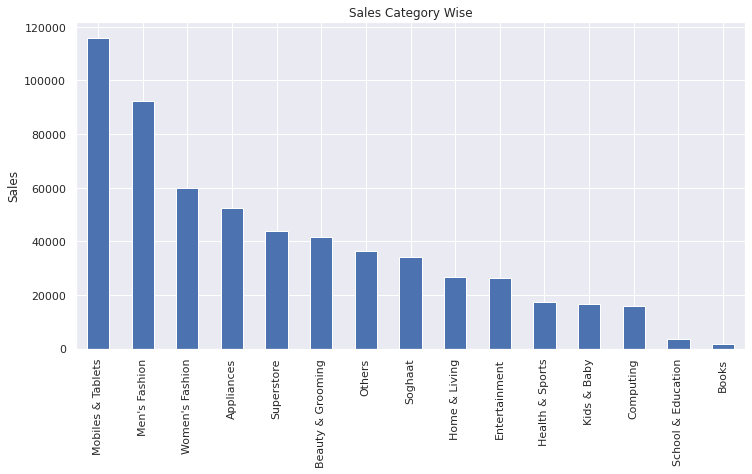

In [114]:
data['category_name'].value_counts(dropna=False).plot.bar(figsize=(12,6))
#plt.xticks(rotation=0)
plt.ylabel('Sales')
plt.title('Sales Category Wise')

In [115]:
data['sku'].fillna("sku_nan",inplace=True)
data['customer_id'].fillna("0",inplace=True)
data['customer_since'].fillna("1-2018",inplace=True)
data.loc[(data['grand_total']< 0), 'grand_total']=0

(0.0, 5000.0)

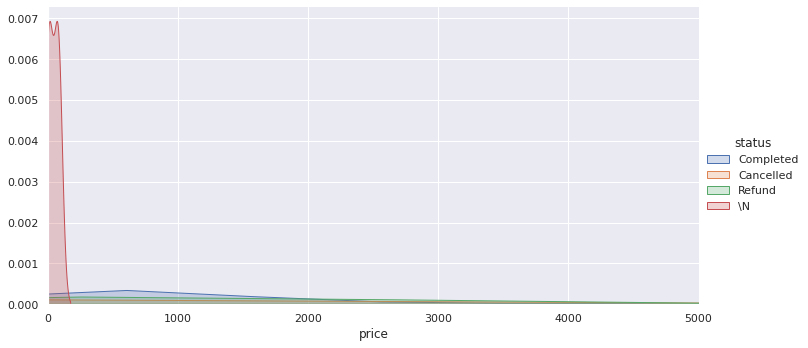

In [116]:
dataordercomp= data[data['status']=='Completed']
g=(sns.FacetGrid(data[data['price'] >0],
               hue='status', height=5, aspect=2)
  .map(sns.kdeplot, 'price', shade=True)
 .add_legend()
)
plt.xlim(0,5000)

(0.0, 6e-05)

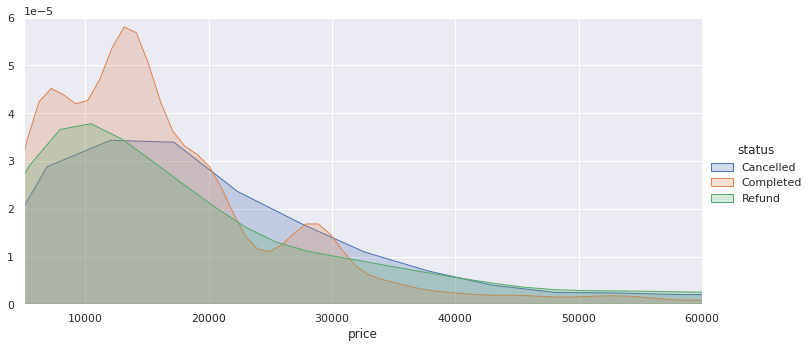

In [117]:
g=(sns.FacetGrid(data[data['price'] >5000],
               hue='status', height=5, aspect=2)
  .map(sns.kdeplot, 'price', shade=True)
 .add_legend()
)

plt.xlim(5000,60000)
plt.ylim(0.00000,0.00006)